In [35]:
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import html5lib
import requests
from openpyxl import Workbook
from datetime import datetime
import webbrowser
import os

In [36]:
path = '../process_tables_MFIC_Investment.xlsx'
xls = pd.ExcelFile(path)
all_sheets = pd.read_excel(path, keep_default_na=False, na_values=[
                           '_'], sheet_name=None)

In [37]:
dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df
    print(f"DataFrame name: {sheet_name} : {sheet_df.shape}")

DataFrame name: September_30_2023 : (308, 9)
DataFrame name: June_30_2023 : (334, 9)
DataFrame name: March_31_2023 : (307, 9)
DataFrame name: December_31_2022 : (269, 9)
DataFrame name: September_30_2022 : (285, 9)
DataFrame name: June_30_2022 : (287, 10)
DataFrame name: March_31_2022 : (285, 10)
DataFrame name: December_31_2021 : (288, 10)
DataFrame name: September_30_2021 : (322, 10)
DataFrame name: June_30_2021 : (379, 10)
DataFrame name: March_31_2021 : (365, 10)
DataFrame name: December_31_2020 : (370, 10)
DataFrame name: September_30_2020 : (391, 10)
DataFrame name: June_30_2020 : (406, 10)
DataFrame name: March_31_2020 : (456, 10)
DataFrame name: December_31_2019 : (389, 10)
DataFrame name: September_30_2019 : (345, 10)
DataFrame name: June_30_2019 : (308, 10)
DataFrame name: March_31_2019 : (254, 10)
DataFrame name: December_31_2018 : (221, 10)
DataFrame name: September_30_2018 : (195, 10)
DataFrame name: June_30_2018 : (177, 9)
DataFrame name: March_31_2018 : (184, 9)
DataFram

In [38]:
for dataframe in dataframes:
    # print(dataframe, ':',
    #       dataframes[dataframe].loc[dataframes[dataframe].shape[0]-1][0])
    if dataframes[dataframe].shape[0]-1 < 250:
        print(
            dataframe, ':', dataframes[dataframe].shape[0]-1)

December_31_2018 : 220
September_30_2018 : 194
June_30_2018 : 176
March_31_2018 : 183
December_31_2017 : 163
September_30_2017 : 159
June_30_2017 : 166
March_31_2017 : 138
December_31_2016 : 148
September_30_2016 : 146
June_30_2016 : 142
March_31_2016 : 149
December_31_2015 : 140
September_30_2015 : 105
June_30_2015 : 110
March_31_2015 : 136
December_31_2014 : 114
September_30_2014 : 128
June_30_2014 : 133
March_31_2014 : 124
December_31_2013 : 136
September_30_2013 : 127
March_31_2013 : 109
June_30_2013 : 122


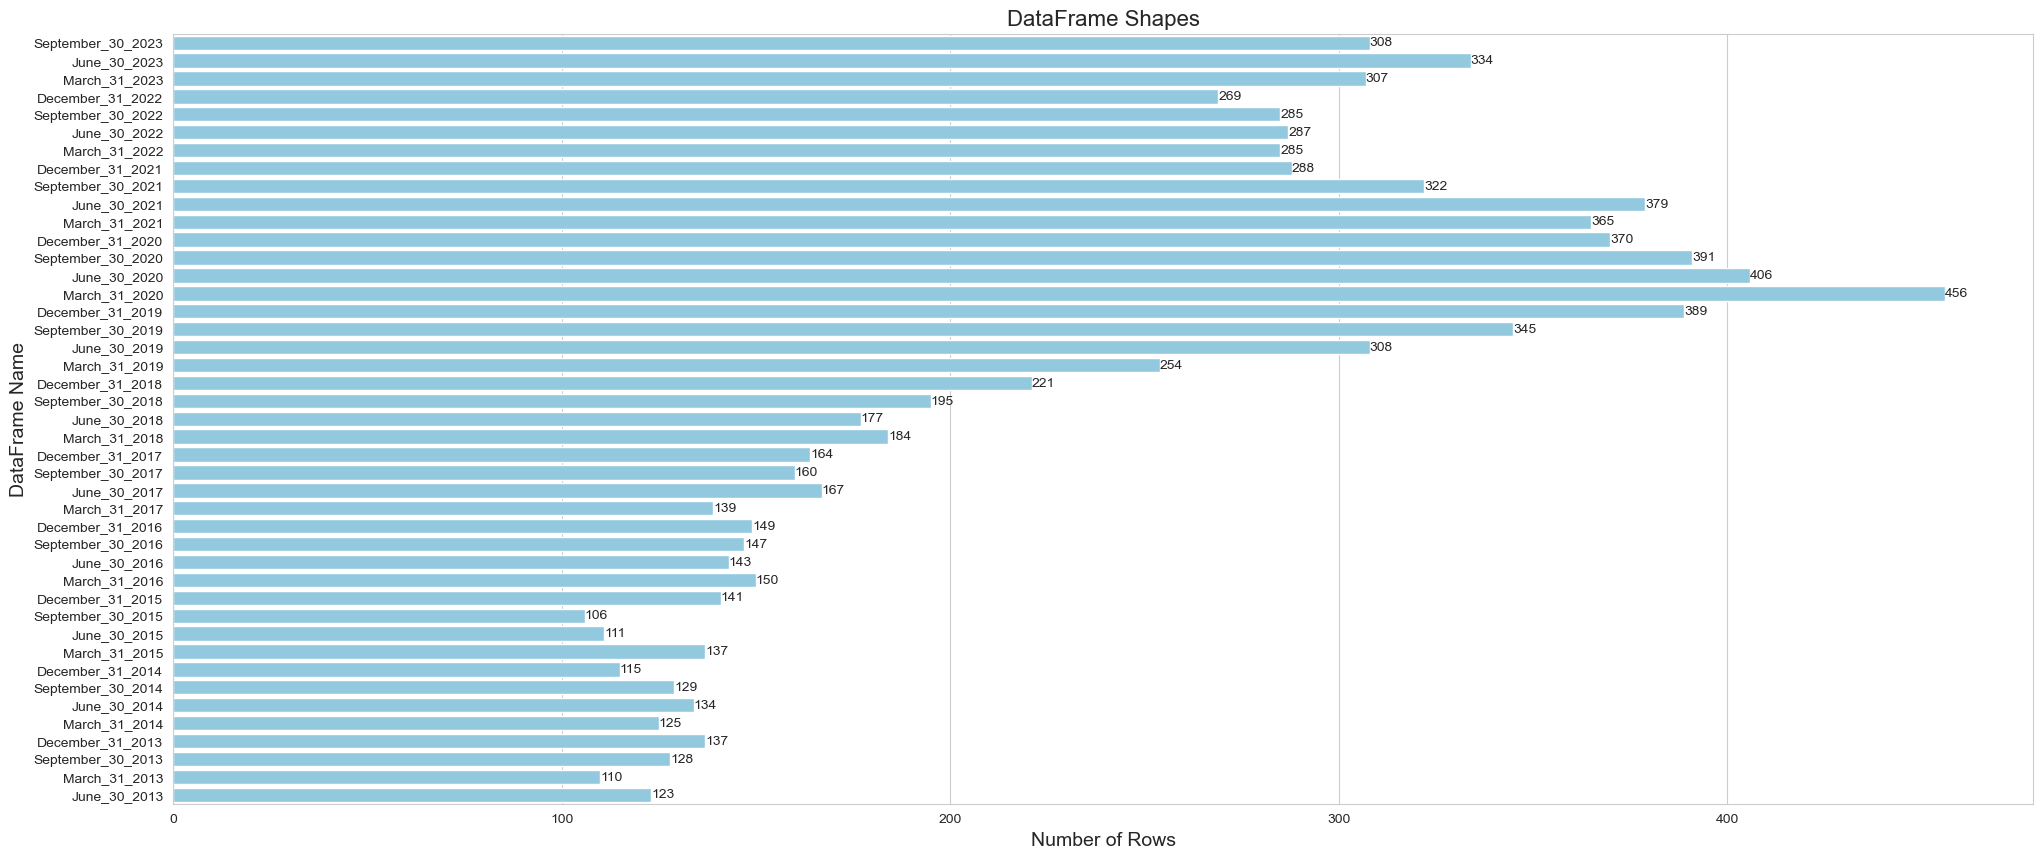

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df

# Extract DataFrame names and shapes
df_names = []
df_shapes = []
for sheet_name, sheet_df in dataframes.items():
    df_names.append(sheet_name)
    df_shapes.append(sheet_df.shape)

# Create a bar graph with Seaborn
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")

# Create a Seaborn barplot
sns.barplot(x=[shape[0] for shape in df_shapes], y=df_names, palette=[
    'red' if shape[0] < 0 else 'skyblue' for shape in df_shapes])

# Customize the appearance of bars
for i, shape in enumerate(df_shapes):
    width = shape[0]
    plt.text(width, i, f'{int(width)}', ha='left', va='center')

# Adjust font size
plt.xlabel('Number of Rows', fontsize=14)
plt.ylabel('DataFrame Name', fontsize=14)
plt.title('DataFrame Shapes', fontsize=16)

plt.show()

In [40]:
def process_table_fun(soi_table_df, process_tables_shapes):
    print(1, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace(r'^\s*\$\s*$', np.nan, regex=True)
    print(2, 'shape:', soi_table_df.shape)
    # fewer non-null values, effectively dropping rows with more than 100 non-null values.
    for index, row in soi_table_df.iterrows():
        if row.count() > 100:
            soi_table_df = soi_table_df.drop(index)
    print(0, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=1)
    print(3, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=0)
    print(4, 'shape:', soi_table_df.shape)
    soi_table_df.dropna()
    print(5, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.rename(
        columns=soi_table_df.iloc[0]).drop(soi_table_df.index[0])
    print(6, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace('—', 0, regex=False)
    print(7, 'shape:', soi_table_df.shape)
    process_tables_shapes.append(soi_table_df.shape)
    return soi_table_df


# df = dataframes['June_30_2021']
# process_table = process_table_fun(df)
# process_table.to_csv("process_table.csv")
# process_table

In [41]:
# for _ in range(len(process_table.columns)):
#     print(process_table.iloc[:, _].unique())

In [42]:
# for _ in range(len(df.columns)):
#     print('')
#     print(df.iloc[:, _].unique())

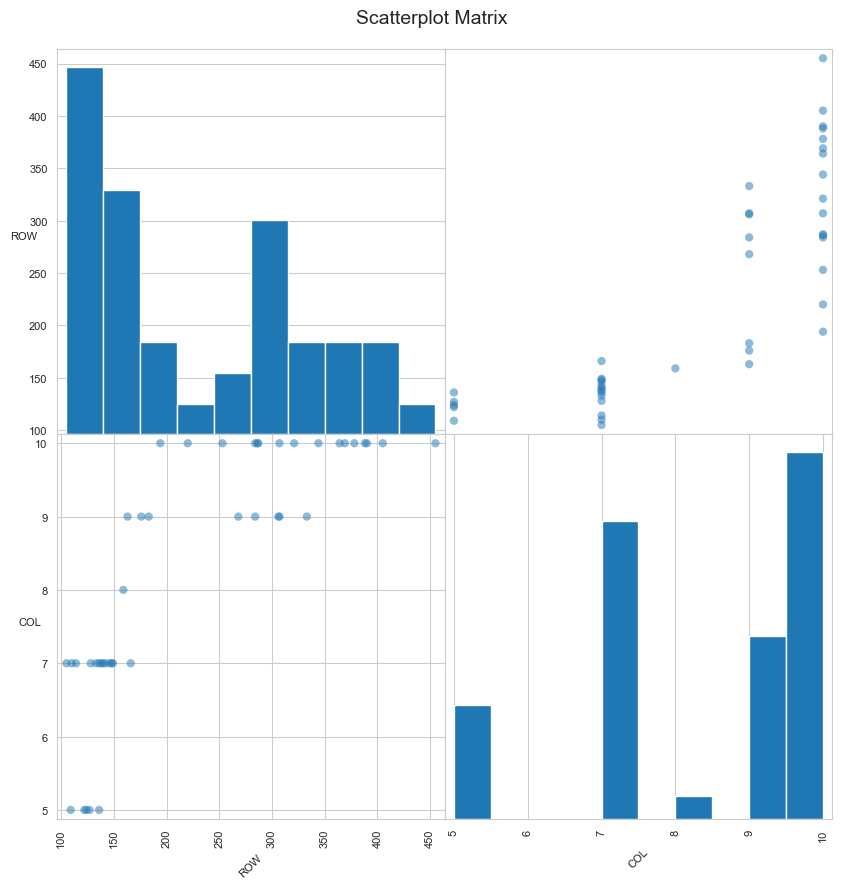

In [43]:
data = pd.DataFrame(process_tables_shape, columns=["ROW", "COL"])
scatter_matrix = pd.plotting.scatter_matrix(
    data, alpha=0.5, figsize=(10, 10), diagonal='hist', marker='o')

# Add labels to the subplots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)

plt.suptitle('Scatterplot Matrix', y=0.92, fontsize=14)

plt.show()

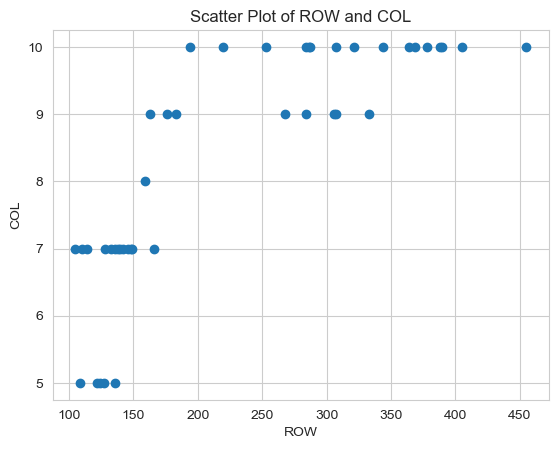

In [44]:
x = [point[0] for point in process_tables_shape]
y = [point[1] for point in process_tables_shape]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('ROW')
plt.ylabel('COL')
plt.title('Scatter Plot of ROW and COL')

# Show the plot
plt.show()

In [45]:
dataframes['December_31_2013'].to_csv('test.csv')

In [46]:
dataframes['December_31_2013']

,INVESTMENTS IN NON-CONTROLLED/NON-AFFILIATED INVESTMENTS 0137.3,Industry,Par Amount,Cost,Fair_Value
0,"Archroma, L+825, 10/1/18 ‡",Chemicals,35511,34819,35422
1,"Avanti Communications Group PLC, 10.00, 10/1/1...",Telecommunications,11000,11000,11468
2,"Avaya, Inc., 9.00, 4/1/19 t",Telecommunications,6973,7134,7304
3,"Aveta, Inc., L+825, 12/12/17",Healthcare,61623,60087,62123
4,"Caza Petroleum Inc., L+1000, 5/23/17",Oil & Gas,35000,33892,33548
...,...,...,...,...,...
132,Gryphon Colleges Corporation (Delta Educationa...,Education,9820,98,0
133,Gryphon Colleges Corporation (Delta Educationa...,Education,45947,460,0
134,Gryphon Colleges Corporation (Delta Educationa...,Education,104314,1043,0
135,"Osage Exploration & Development, Inc., Common **‡",Oil & Gas,1496843,0,1171
